# LASSO Regression (L1 Regression)

Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

\begin{align}
L_{lasso} = argmin_\beta(||Y - \beta * X||^2 + \lambda*||\beta||_1)
\end{align}

# Limitation of Lasso Regression:
1) Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set). 

2) If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

Lasso Regression Coefficients: [41.84097725]
Mean Squared Error (MSE): 96.2642162450571


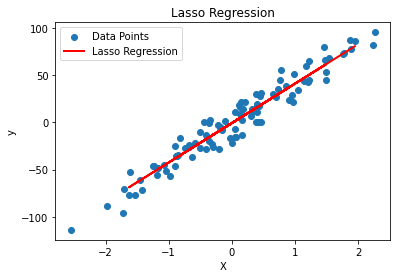

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Lasso Regression model
lasso = Lasso(alpha=1.0)  # The alpha parameter controls the strength of regularization

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the model coefficients and MSE
print("Lasso Regression Coefficients:", lasso.coef_)
print("Mean Squared Error (MSE):", mse)

# Plot the data and the Lasso Regression line
plt.scatter(X, y, label="Data Points")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Lasso Regression")
plt.show()

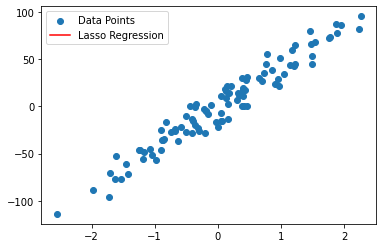

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from matplotlib.animation import FuncAnimation

# Generate synthetic data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Create a range of alpha values for Lasso
alphas = np.logspace(-2, 2, 100)  # Vary the alpha parameter

# Initialize lists to store coefficients and MSE for each alpha
coefficients = []
mse_values = []

# Create a figure and axis for plotting
fig, ax = plt.subplots()
ax.scatter(X, y, label="Data Points")
line, = ax.plot([], [], color="red", label="Lasso Regression")

# Function to initialize the plot
def init():
    line.set_data([], [])
    return line,

# Function to update the plot in each animation frame
def update(frame):
    alpha = alphas[frame]
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    y_pred = lasso.predict(X)
    mse = mean_squared_error(y, y_pred)
    coefficients.append(lasso.coef_)
    mse_values.append(mse)
    line.set_data(X, y_pred)
    ax.set_title(f"Lasso Path (alpha={alpha:.2f})")
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(alphas), init_func=init, blit=True)

# Show the animation
plt.legend()
plt.show()

In [3]:
from IPython import display

video = ani.to_html5_video()
html_code = display.HTML(video)
display.display(html_code)

# ===========================XXXXX============================
# ===========================XXXXX============================

# Ridge Regression (L2 Regression)
In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient $\lambda$ to control that penalty term. In this case, if $\lambda$ is zero, then the equation is the basic OLS; else, if $\lambda > 0$, then it will add a constraint to the coefficient. As we increase the value of $\lambda$, this constraint causes the value of the coefficient to tend towards zero. This leads to a tradeoff of higher bias (dependencies on certain coefficients tend to be 0, and on certain coefficients tend to be very large, making the model less flexible) for lower variance.

\begin{align}
L_{Ridge} = argmin_\beta(||Y - \beta * X||^2 + \lambda*||\beta||_2^2)
\end{align}

where $\lambda$ is regularization penalty.
Limitation of Ridge Regression: Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

Ridge Regression Coefficients: [42.28740819]
Mean Squared Error (MSE): 96.48797644124947


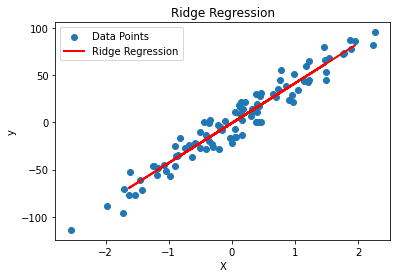

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Ridge Regression model
ridge = Ridge(alpha=1.0)  # The alpha parameter controls the strength of regularization

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the model coefficients and MSE
print("Ridge Regression Coefficients:", ridge.coef_)
print("Mean Squared Error (MSE):", mse)

# Plot the data and the Ridge Regression line
plt.scatter(X, y, label="Data Points")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Ridge Regression")
plt.show()

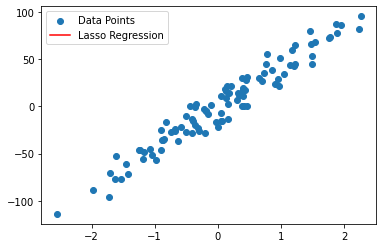

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from matplotlib.animation import FuncAnimation

# Generate synthetic data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Create a range of alpha values for Lasso
alphas = np.logspace(-2, 2, 100)  # Vary the alpha parameter

# Initialize lists to store coefficients and MSE for each alpha
coefficients = []
mse_values = []

# Create a figure and axis for plotting
fig, ax = plt.subplots()
ax.scatter(X, y, label="Data Points")
line, = ax.plot([], [], color="red", label="Lasso Regression")

# Function to initialize the plot
def init():
    line.set_data([], [])
    return line,

# Function to update the plot in each animation frame
def update(frame):
    alpha = alphas[frame]
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    y_pred = lasso.predict(X)
    mse = mean_squared_error(y, y_pred)
    coefficients.append(lasso.coef_)
    mse_values.append(mse)
    line.set_data(X, y_pred)
    ax.set_title(f"Lasso Path (alpha={alpha:.2f})")
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(alphas), init_func=init, blit=True)

# Show the animation
plt.legend()
plt.show()

In [6]:
from IPython import display

video = ani.to_html5_video()
html_code = display.HTML(video)
display.display(html_code)

# =========================XXXXX==============================
# =========================XXXXX==============================
# Elastic Net Regression

Elastic Net Regression is a linear regression technique that combines L1 (Lasso) and L2 (Ridge) regularization penalties to address some of their limitations. It balances the effects of both penalties to find a solution that encourages sparsity (feature selection) while also preventing overfitting.

\begin{align}
L_{elasticNet} = argmin_\beta(\beta)(\sum(y - x_i^j\beta)^2/2n + \lambda((1 + \alpha)/2*\sum_{j=1}^{m}\beta_j^2 + \alpha*\sum_{j=1}^{m}||\beta_j||)
\end{align}

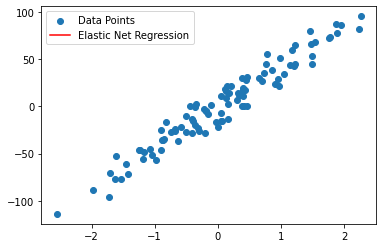

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from matplotlib.animation import FuncAnimation

# Generate synthetic data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a range of alpha values for Elastic Net
alphas = np.logspace(-2, 2, 100)  # Vary the alpha parameter

# Initialize lists to store coefficients and MSE for each alpha
coefficients = []
mse_values = []

# Create a figure and axis for plotting
fig, ax = plt.subplots()
ax.scatter(X, y, label="Data Points")
line, = ax.plot([], [], color="red", label="Elastic Net Regression")

# Function to initialize the plot
def init():
    line.set_data([], [])
    return line,

# Function to update the plot in each animation frame
def update(frame):
    alpha = alphas[frame]
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net.fit(X_train, y_train)
    y_pred = elastic_net.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    coefficients.append(elastic_net.coef_)
    mse_values.append(mse)
    line.set_data(X_test, y_pred)
    ax.set_title(f"Elastic Net Path (alpha={alpha:.2f})")
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(alphas), init_func=init, blit=True)

# Show the animation
plt.legend()
plt.show()

In [9]:
from IPython import display

video = ani.to_html5_video()
html_code = display.HTML(video)
display.display(html_code)